In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from typing import Union

%matplotlib inline

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


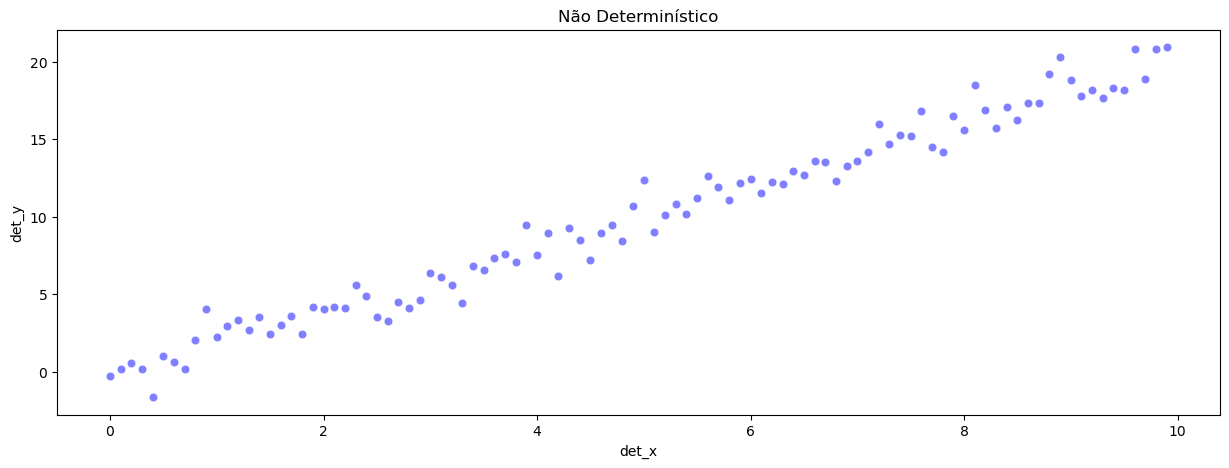

In [2]:
# exemplo de plots não determinísticos
det_x = np.arange(0, 10, 0.1)
det_y = 2 * det_x + np.random.normal(size=100)

# transformando em data frame não deterministicos
series = pd.Series(det_y, det_x)
df = pd.DataFrame(series, columns = ['det_y'])
df.reset_index(drop = False, inplace = True)
df = df.rename(columns = {'index':'det_x'})

feature_name_non = "det_x"
target_name_non = "det_y"
data_non, target_non = df[[feature_name_non]], df[target_name_non]

plt.figure(figsize=(15,5), constrained_layout=False)

ax = sns.scatterplot(data=df, x=feature_name_non, y=target_name_non,
					color="blue", alpha=0.5)
ax.set_title("Não Determinístico")

_ = plt.show()

# Matemática em ação calculo da Regressão Linear populacional
---
O calculo da Regressão Linear para encontrar um ponto que ainda não consta na base de dados pode ser definida pela expressão abaixo:

$y$ = $\beta_0 + \beta_1.X + \epsilon$

$y$ $\Rightarrow$ é a variável dependente, ou seja, o valor previsto.

$\beta_0$ $\Rightarrow$ é o coeficiente que intercepta ou que corta o eixo y.
 
$\beta_1$ $\Rightarrow$ é o coeficiente que define a inclinação da reta.

$X$ $\Rightarrow$ é a variável independente, ou seja, a variável preditora.

Para representar a relação entre uma variável dependente ($y$) e uma variável independente ($x$), usamos o modelo
que determina uma linha reta com inclinação $\beta_1$ e intercepto $\beta_0$, com a variável aleatória (erro) $\varepsilon$, considerada normalmente distribuída com $E(\varepsilon) = 0$.

Para simplificar, vamos assumir a premissa de que o valor médio da variável $\varepsilon$ para um dado valor de $x$ é $0$.

Outro ponto é que vamos ter que criar novas colunas tais como:

- Regressão Linear não é linear e função afim, onde o mesmo peso de entrada tem que refletir na sua saida:
	- x = 1 => y = 2
	- x = 2 => y = 4

In [3]:
def beta_1(df: pd.DataFrame) -> Union[float, pd.DataFrame]:
	"""
	Calcula a inclinação β₁.

	A fórmula para β₁ é:

	β₁ = (n Σ xᵢyᵢ - Σ xᵢ Σ yᵢ) / (n Σ xᵢ² - (Σ xᵢ)²)

	Onde:
	* xᵢ: posição no eixo X do plano cartesiano.
	* yᵢ: posição no eixo Y do plano cartesiano.
	* i: índice do i-ésimo valor de X e Y.
	* n: número de pares ordenados na base de dados.
	* Σ: operador de somatório.
	
	Args:
	df (pd.DataFrame): DataFrame contendo as colunas 'x' e 'y'.

	Return:
	pd.DataFrame: DataFrame com uma nova coluna 'beta_1' contendo o
	cálculo da inclinação.

	β₁:
	* Séria o impacto ou peso multiplica por x.
	"""
	df['det_xy'] = df['det_x'] * df['det_y']
	df['det_x^2'] = df['det_x'] ** 2
	df['det_y^2'] = df['det_y'] ** 2

	n = len(df)
	sigmaXi = sum(df['det_x'])
	sigmaYi= sum(df['det_y'])
	sigmaXiYi =sum(df['det_xy'])
	sigmaXi2 = sum(df['det_x^2'])

	print(f"Número de pares ordenados utilizado na base: {n}")
	print(f"Somatorio da coluna X: {sigmaXi}")
	print(f"Somatorio da coluna Y: {sigmaYi}")
	print(f"Somatorio da coluna X e Y: {sigmaXiYi}")
	print(f"Somatorio da coluna X ao quadrado: {sigmaXi2}")

	b1 = ((n * sigmaXiYi) - (sigmaXi * sigmaYi)) / ((n * sigmaXi2) - (sigmaXi ** 2))

	return b1, df

In [4]:
b1, df = beta_1(df)
print(b1)
df.head()

Número de pares ordenados utilizado na base: 100
Somatorio da coluna X: 495.0
Somatorio da coluna Y: 985.9678829503376
Somatorio da coluna X e Y: 6599.325390989253
Somatorio da coluna X ao quadrado: 3283.5000000000005
2.0627475192140183


,det_x,det_y,det_xy,det_x^2,det_y^2
0,0.0,-0.299365,-0.000000,0.00,0.089619
1,0.1,0.179720,0.017972,0.01,0.032299
2,0.2,0.537314,0.107463,0.04,0.288707
3,0.3,0.198571,0.059571,0.09,0.039430
4,0.4,-1.642267,-0.656907,0.16,2.697042


In [5]:
def	beta_0(b1: float, df: pd.DataFrame) -> Union[float, pd.DataFrame]:
	"""
	Calcula o intercepto β₀ usando a fórmula:

	β₀ = (Σy - β₁ Σx) / n

	Onde:
	* β₁: coeficiente que define a inclinação da reta.
	* Σx: somatório dos valores de x.
	* Σy: somatório dos valores de y.
	* n: número de pares ordenados na base de dados.

	Parâmetros:
	b1 (float): Coeficiente da inclinação β₁.
	df (pd.DataFrame): DataFrame contendo as colunas 'det_x' e 'det_y'.

	Retorna:
	Union[float, pd.DataFrame]: O valor de β₀ ou um DataFrame modificado.
	"""

	n = len(df)
	sigmaXi = sum(df['det_x'])
	sigmaYi = sum(df['det_y'])
	print(f"Número de pares ordenados utilizado na base: {n}")
	print(f"Somatorio da coluna X: {sigmaXi}")
	print(f"Somatorio da coluna Y: {sigmaYi}")
	print(f"Coeficiente que define a inclinação da reta: {b1}")

	b0 = ((sigmaYi) - (b1 * sigmaXi)) / n

	return b0

In [6]:
b0 = beta_0(b1, df)
b0

Número de pares ordenados utilizado na base: 100
Somatorio da coluna X: 495.0
Somatorio da coluna Y: 985.9678829503376
Coeficiente que define a inclinação da reta: 2.0627475192140183


-0.35092139060601424

In [7]:
# b0 é o menor custo que ele pode ter.
# b1 vai +/- ser duas vezes o valor.
print(f"y = {b0} + {b1} * X")

y = -0.35092139060601424 + 2.0627475192140183 * X


In [8]:
# input do valor de x que não consta em nossos dados.
x = 4.65
y = b0 + (b1 * x)
y

9.24085457373917

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


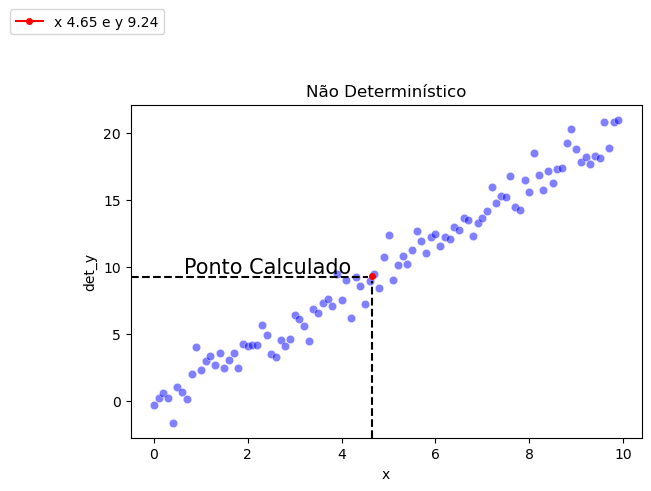

In [9]:
# encontrando o ponto no grafico com os valores de X e Y
point = pd.DataFrame({'x': [4.65], 'y': [9.27]})
plt.figure(constrained_layout=True)
ax = sns.scatterplot(data = df, x = feature_name_non, y = target_name_non, 
					color = "blue", alpha = 0.5)

label = "x {0:.2f} e y {1:.2f}"
ax = point.plot(x='x', y='y', ax=ax, marker='o', markersize=4, color="red", label=label.format(x, y))
ax.legend(loc='center left', bbox_to_anchor=(-0.25, 1.25), ncol=1)

eixo_x = x
plt.axvline(x= eixo_x, ymin=0, ymax=0.47, color="black", linestyle="--")

eixo_y = y
plt.axhline(y= eixo_y, xmin=0, xmax=0.465, color="black", linestyle="--")

plt.annotate("Ponto Calculado", (.65, 9.5), fontsize=15)

_ = ax.set_title("Não Determinístico")

In [10]:
def linear_model_predict(x, beta_um, beta_zero):
	"""Linear model funcao y = a * x + b"""
	y = x * beta_um + beta_zero
	return y

In [11]:
reta_ajuste = linear_model_predict(df['det_x'], b1, b0)
reta_ajuste[:5]

0   -0.350921
1   -0.144647
2    0.061628
3    0.267903
4    0.474178
Name: det_x, dtype: float64

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


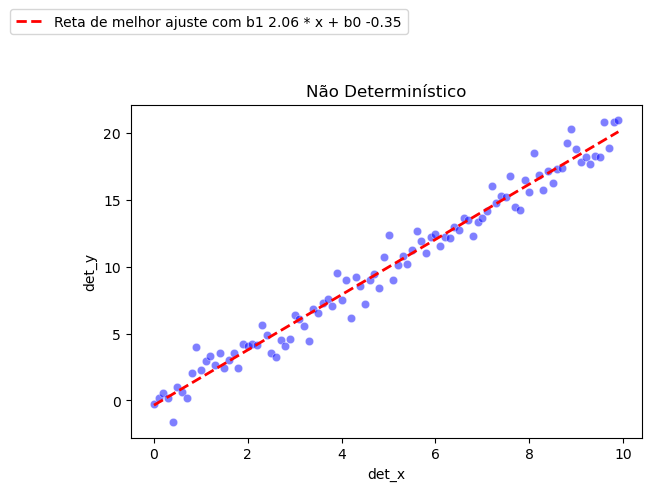

In [12]:
# Plot da reta de melhor ajuste
plt.figure(constrained_layout=True)
ax = sns.scatterplot(data=df, x=feature_name_non, y=target_name_non,
					 color="blue", alpha=0.5)

label = "Reta de melhor ajuste com b1 {0:.2f} * x + b0 {1:.2f}"
ax.plot(df['det_x'], reta_ajuste, color='r', linestyle='--', linewidth=2 ,label=label.format(b1, b0))
ax.legend(loc='center left', bbox_to_anchor=(-0.25, 1.25), ncol=1)
_ = ax.set_title("Não Determinístico")

In [13]:
def mean_squared_error(x, y, beta_um, beta_zero):
	"""
	Calcula o Erro Quadrático Médio (MSE) para um modelo de regressão linear.

	O MSE é uma medida da qualidade de um estimador — é sempre não-negativo,
	e valores menores indicam um modelo melhor.

	Args:
	x (list or pd.Series): Valores das variáveis independentes.
	y (list or pd.Series): Valores das variáveis dependentes observadas.
	beta_um (float): Coeficiente da inclinação da reta de regressão (β₁).
	beta_zero (float): Intercepto da reta de regressão (β₀).

	Return:
	float: O Erro Quadrático Médio (MSE).

	Use exemple:
	```python
	mse = mean_squared_error([1, 2, 3], [2, 4, 6], 2, 0)
	print(f"Erro Quadrático Médio: {mse}")
	```
	MSE:
	* É igual sqrt'mse'
	"""
	predictions = [linear_model_predict(xi, beta_um, beta_zero) for xi in x]
	mse = sum([(y[i] - predictions[i]) ** 2 for i in range(len(y))]) / len(y)

	mae = sum([np.abs(y[i] - predictions[i]) for i in range(len(y))]) / len(y)
	return mse, mae

mse, mae = mean_squared_error(df['det_x'], df['det_y'], b1, b0)
print(f"Erro Quadrático Médio: {mse}")
print(f"Erro Absoluto Médio: {mae}")

Erro Quadrático Médio: 0.9235790793697589
Erro Absoluto Médio: 0.7454009081515675


In [14]:
def calcular_erros(df, b1, b0):
	"""
	Calcula os erros de previsão para um modelo de regressão linear.
	
	Parâmetros:
	df (pd.DataFrame): DataFrame contendo as colunas 'det_x' e 'det_y'.
	b1 (float): Coeficiente da inclinação da reta de regressão (β₁).
	b0 (float): Intercepto da reta de regressão (β₀).
	
	Retorna:
	pd.Series: Série com os erros de previsão.
	"""
	df['pred_y'] = df['det_x'] * b1 + b0
	df['erro'] = df['det_y'] - df['pred_y']
	return df

In [15]:
# Calcular erros
df = calcular_erros(df, b1, b0)
df.head()

,det_x,det_y,det_xy,det_x^2,det_y^2,pred_y,erro
0,0.0,-0.299365,-0.000000,0.00,0.089619,-0.350921,0.051557
1,0.1,0.179720,0.017972,0.01,0.032299,-0.144647,0.324367
2,0.2,0.537314,0.107463,0.04,0.288707,0.061628,0.475686
3,0.3,0.198571,0.059571,0.09,0.039430,0.267903,-0.069332
4,0.4,-1.642267,-0.656907,0.16,2.697042,0.474178,-2.116445


c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


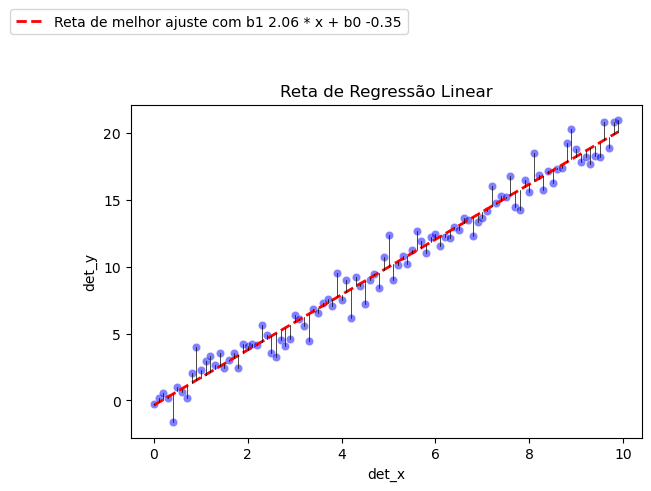

In [16]:
# Plotar o gráfico
plt.figure(constrained_layout=True)
ax = sns.scatterplot(data=df, x='det_x', y='det_y', color="blue", alpha=0.5)

label = f"Reta de melhor ajuste com b1 {b1:.2f} * x + b0 {b0:.2f}"
ax.plot(df['det_x'], df['pred_y'], color='r', linestyle='--', linewidth=2, label=label)
ax.legend(loc='center left', bbox_to_anchor=(-0.25, 1.25), ncol=1)

# Plotar os erros
for i in range(len(df)):
	plt.plot([df['det_x'][i], df['det_x'][i]], [df['det_y'][i], df['pred_y'][i]], 'k-', lw=0.5)

_= ax.set_title("Reta de Regressão Linear")


Derivada do erro é convecsa
Conversa

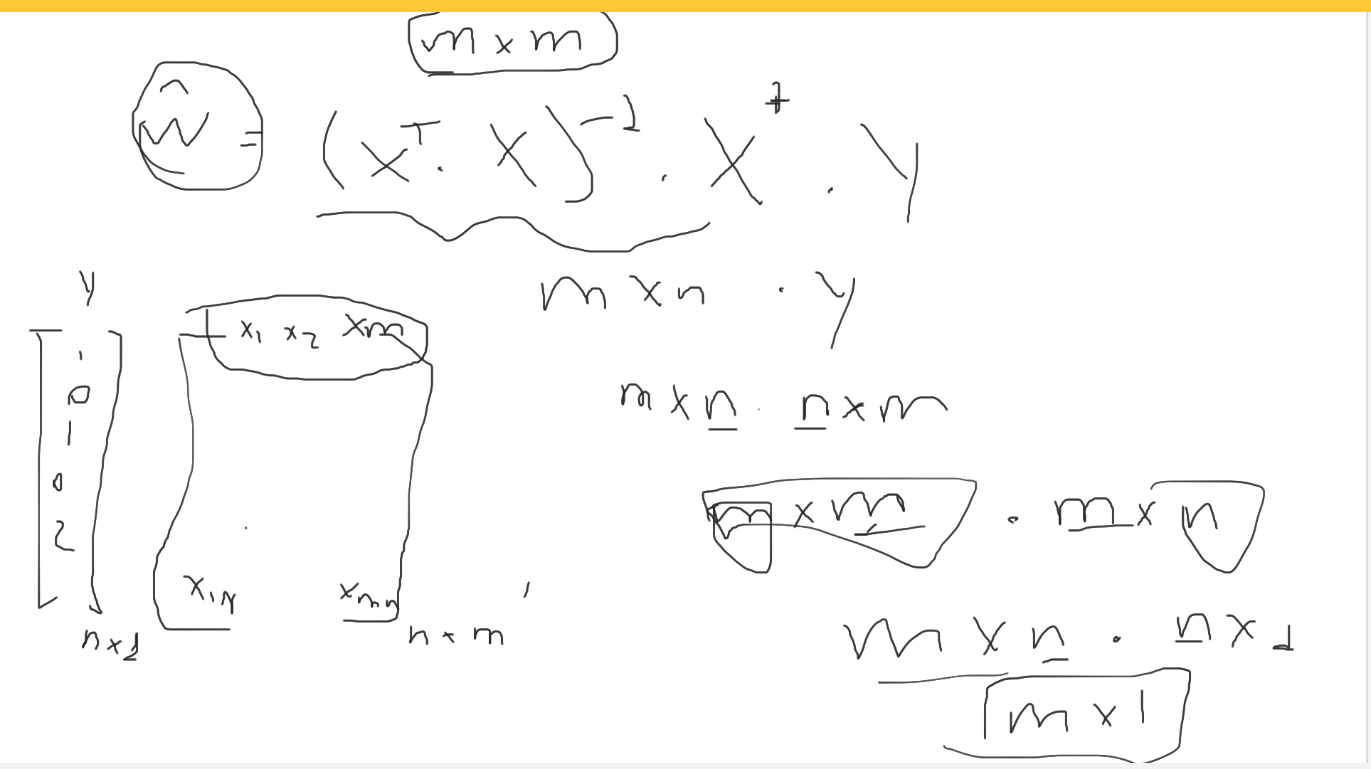

w^ = estimado

# Algebra Linear Numpy refresher
---

Plano:

* Vector operations
* Multiplication
    * Vector-vector multiplication
    * Matrix-vector multiplication
    * Matrix-matrix multiplication
* Identity matrix
* Inverse

In [17]:
import numpy as np

### Operações com vetor

---

A multiplicação de um vetor por um escalar é feita multiplicando cada componente do vetor pelo escalar:

$$2 \times \mathbf{u} = 2 \times \begin{bmatrix} 2 \\ 4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix} 2 \times 2 \\ 2 \times 4 \\ 2 \times 5 \\ 2 \times 6 \end{bmatrix} = \begin{bmatrix} 4 \\ 8 \\ 10 \\ 12 \end{bmatrix}
$$


In [18]:
u = np.array([2, 4, 5, 6])
2 * u

array([ 4,  8, 10, 12])

A soma de dois vetores $\mathbf{u}$ e $\mathbf{v}$ é feita somando-se os componentes correspondentes dos vetores:

$$\mathbf{u} = \begin{bmatrix} 2 \\ 4 \\ 5 \\ 6 \end{bmatrix}, \quad \mathbf{v} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 2 \end{bmatrix}
$$

$$
\mathbf{u} + \mathbf{v} = \begin{bmatrix} 2 \\ 4 \\ 5 \\ 6 \end{bmatrix} + \begin{bmatrix} 1 \\ 0 \\ 0 \\ 2 \end{bmatrix} = \begin{bmatrix} 2 + 1 \\ 4 + 0 \\ 5 + 0 \\ 6 + 2 \end{bmatrix} = \begin{bmatrix} 3 \\ 4 \\ 5 \\ 8 \end{bmatrix}
$$

In [19]:
v = np.array([1, 0, 0, 2])
u + v

array([3, 4, 5, 8])

A multiplicação elemento a elemento (produto Hadamard) dos vetores $\mathbf{u}$ e $\mathbf{v}$ é feita multiplicando os componentes correspondentes dos vetores:

$$
\mathbf{u} = \begin{bmatrix} 2 \\ 4 \\ 5 \\ 6 \end{bmatrix}, \quad \mathbf{v} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 2 \end{bmatrix}
$$

$$
\mathbf{u} \times \mathbf{v} = \begin{bmatrix} 2 \\ 4 \\ 5 \\ 6 \end{bmatrix} \times \begin{bmatrix} 1 \\ 0 \\ 0 \\ 2 \end{bmatrix} = \begin{bmatrix} 2 \times 1 \\ 4 \times 0 \\ 5 \times 0 \\ 6 \times 2 \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \\ 0 \\ 12 \end{bmatrix}
$$

In [20]:
u * v

array([ 2,  0,  0, 12])

### Multiplication

Cálculo do Produto Interno

Dado os vetores $\mathbf{u}$ e $\mathbf{v}$:

$$
\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_n \end{bmatrix}, \quad \mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}
$$

O produto interno $\mathbf{u} \cdot \mathbf{v}$ é dado por:

$$
\mathbf{u} \cdot \mathbf{v} = u_1 \times v_1 + u_2 \times v_2 + \cdots + u_n \times v_n
$$

Para os vetores específicos $\mathbf{u} = \begin{bmatrix} 2 \\ 4 \\ 5 \\ 6 \end{bmatrix}$ e $\mathbf{v} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 2 \end{bmatrix}$, o cálculo será:

$$
\mathbf{u} \cdot \mathbf{v} = 2 \times 1 + 4 \times 0 + 5 \times 0 + 6 \times 2 = 2 + 0 + 0 + 12 = 14
$$


In [21]:
print(v)
print(v.shape[0])

[1 0 0 2]
4


In [22]:
def	vector_vector_multiplication(u, v):
	assert u.shape[0] == v.shape[0]
	n = u.shape[0]

	result = 0.0
	for i in range(n):
		result = result + u[i] * v[i]

	return result

In [23]:
print(f'funcao implementada: {vector_vector_multiplication(u, v)}')
print(f'numpy: {u.dot(v)}')

funcao implementada: 14.0
numpy: 14


Multiplicação de Matriz por Vetor

Dada a matriz $\mathbf{U}$ e o vetor $\mathbf{v}$:

**Matriz** $\mathbf{U}$

$$
\mathbf{U} = \begin{bmatrix} 
2 & 4 & 5 & 6 \\ 
1 & 2 & 1 & 2 \\ 
3 & 1 & 2 & 1 
\end{bmatrix}
$$

**Vetor** $\mathbf{v}$

$$
\mathbf{v} = \begin{bmatrix} 
v_1 \\ 
v_2 \\ 
v_3 \\ 
v_4 
\end{bmatrix}
$$

Cálculo da Multiplicação $\mathbf{U} \times \mathbf{v}$

A multiplicação de uma matriz por um vetor é feita multiplicando cada linha da matriz pelo vetor, resultando em um novo vetor:

$$
\mathbf{U} \times \mathbf{v} = \begin{bmatrix} 
2 & 4 & 5 & 6 \\ 
1 & 2 & 1 & 2 \\ 
3 & 1 & 2 & 1 
\end{bmatrix} \times \begin{bmatrix} 
v_1 \\ 
v_2 \\ 
v_3 \\ 
v_4 
\end{bmatrix} 
$$

O resultado é um novo vetor:

$$
\mathbf{U} \times \mathbf{v} = \begin{bmatrix} 
(2 \times v_1) + (4 \times v_2) + (5 \times v_3) + (6 \times v_4) \\ 
(1 \times v_1) + (2 \times v_2) + (1 \times v_3) + (2 \times v_4) \\ 
(3 \times v_1) + (1 \times v_2) + (2 \times v_3) + (1 \times v_4) 
\end{bmatrix}
$$


In [24]:
# Matriz U
U = np.array([
	[2, 4, 5, 6],
	[1, 2, 1, 2],
	[3, 1, 2, 1],
])
print(f'Corpo da matriz: {U.shape}')
print(f'Quantidade de colunas da matriz: {U.shape[1]}')
print(f'Quantidade de linhas da matriz: {U.shape[0]}')

Corpo da matriz: (3, 4)
Quantidade de colunas da matriz: 4
Quantidade de linhas da matriz: 3


In [25]:
def	matrix_vector_multiplication(U, v):
	assert U.shape[1] == v.shape[0]

	num_rows = U.shape[0]
	result = np.zeros(num_rows)

	for i in range(num_rows):
		result[i] = vector_vector_multiplication(U[i], v)

	return result

In [26]:
print(f'funcao implementada: {matrix_vector_multiplication(U, v)}')
print(f'numpy: {U.dot(v)}')

funcao implementada: [14.  5.  5.]
numpy: [14  5  5]


Multiplicação de Matriz por Matriz

Dadas as matrizes $\mathbf{U}$ e $\mathbf{V}$:

**Matriz** $\mathbf{U}$

$$
\mathbf{U} = \begin{bmatrix} 
2 & 4 & 5 & 6 \\ 
1 & 2 & 1 & 2 \\ 
3 & 1 & 2 & 1 
\end{bmatrix}
$$

**Matriz** $\mathbf{V}$

$$
\mathbf{V} = \begin{bmatrix} 
1 & 1 & 2 \\ 
0 & 0.5 & 1 \\ 
0 & 2 & 1 \\ 
2 & 1 & 0 
\end{bmatrix}
$$

Cálculo da Multiplicação $\mathbf{U} \times \mathbf{V}$

A multiplicação de duas matrizes é feita multiplicando cada linha da matriz $\mathbf{U}$ por cada coluna da matriz $\mathbf{V}$, resultando em uma nova matriz.

O cálculo para a matriz resultante é dado por:

$$
\mathbf{U} \times \mathbf{V} = \begin{bmatrix} 
\text{linha}_1 \times \text{coluna}_1 & \text{linha}_1 \times \text{coluna}_2 & \text{linha}_1 \times \text{coluna}_3 \\ 
\text{linha}_2 \times \text{coluna}_1 & \text{linha}_2 \times \text{coluna}_2 & \text{linha}_2 \times \text{coluna}_3 \\ 
\text{linha}_3 \times \text{coluna}_1 & \text{linha}_3 \times \text{coluna}_2 & \text{linha}_3 \times \text{coluna}_3 
\end{bmatrix}
$$

Para calcular cada elemento da matriz resultante, multiplicamos a respectiva linha da matriz $\mathbf{U}$ pela respectiva coluna da matriz $\mathbf{V}$ e somamos os produtos:

$$
\mathbf{U} \times \mathbf{V} = \begin{bmatrix} 
(2 \times 1) + (4 \times 0) + (5 \times 0) + (6 \times 2) & (2 \times 1) + (4 \times 0.5) + (5 \times 2) + (6 \times 1) & (2 \times 2) + (4 \times 1) + (5 \times 1) + (6 \times 0) \\ 
(1 \times 1) + (2 \times 0) + (1 \times 0) + (2 \times 2) & (1 \times 1) + (2 \times 0.5) + (1 \times 2) + (2 \times 1) & (1 \times 2) + (2 \times 1) + (1 \times 1) + (2 \times 0) \\ 
(3 \times 1) + (1 \times 0) + (2 \times 0) + (1 \times 2) & (3 \times 1) + (1 \times 0.5) + (2 \times 2) + (1 \times 1) & (3 \times 2) + (1 \times 1) + (2 \times 1) + (1 \times 0)
\end{bmatrix}
$$


In [27]:
V = np.array([
	[1, 1, 2],
	[0, 0.5, 1], 
	[0, 2, 1],
	[2, 1, 0],
])
print(f'Corpo da matriz U: {U.shape}')
print(f'Quantidade de colunas da matriz U: {U.shape[1]}')
print(f'Quantidade de linhas da matriz U: {U.shape[0]}')
print('------------------------------------')
print(f'Corpo da matriz V: {V.shape}')
print(f'Quantidade de colunas da matriz V: {V.shape[1]}')
print(f'Quantidade de linhas da matriz V: {V.shape[0]}')

Corpo da matriz U: (3, 4)
Quantidade de colunas da matriz U: 4
Quantidade de linhas da matriz U: 3
------------------------------------
Corpo da matriz V: (4, 3)
Quantidade de colunas da matriz V: 3
Quantidade de linhas da matriz V: 4


In [28]:
def	matrix_matrix_multiplication(U, V):
	assert U.shape[1] == V.shape[0]

	num_rows = U.shape[0]
	num_cols = V.shape[1]

	result = np.zeros((num_rows, num_cols))
	for i in range(num_cols):
		vi = V[:, i]
		Uvi = matrix_vector_multiplication(U, vi)
		result[:, i] = Uvi

	return result

In [29]:
print(f'funcao implementada:\n {matrix_matrix_multiplication(U, V)}')
print(f'numpy:\n {U.dot(V)}')

funcao implementada:
 [[14.  20.  13. ]
 [ 5.   6.   5. ]
 [ 5.   8.5  9. ]]
numpy:
 [[14.  20.  13. ]
 [ 5.   6.   5. ]
 [ 5.   8.5  9. ]]


### Identity Matrix

Multiplicação da Matriz $\mathbf{V}$ pela Matriz Identidade $\mathbf{I}_{\text{imple}}$

Dada a matriz $\mathbf{V}$:

$$
\mathbf{V} = \begin{bmatrix}
1 & 1 & 2 \\
0 & 0.5 & 1 \\
0 & 2 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

E a matriz identidade $\mathbf{I}_{\text{imple}}$ gerada pela função `create_identity_matrix(U, V)`:

$$
\mathbf{I}_{\text{imple}} = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

A multiplicação de $\mathbf{V}$ pela matriz identidade $\mathbf{I}_{\text{imple}}$ é calculada como segue:

$$
\mathbf{V} \times \mathbf{I}_{\text{imple}} = \begin{bmatrix}
1 & 1 & 2 \\
0 & 0.5 & 1 \\
0 & 2 & 1 \\
2 & 1 & 0
\end{bmatrix}
\times
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

O resultado da multiplicação é a própria matriz $\mathbf{V}$:

$$
\mathbf{V} \times \mathbf{I}_{\text{imple}} = \begin{bmatrix}
1 & 1 & 2 \\
0 & 0.5 & 1 \\
0 & 2 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

A multiplicação de qualquer matriz pela matriz identidade de dimensão correspondente resulta na própria matriz, como observado neste exemplo.

In [30]:
import numpy as np
# diagonal principal
def create_identity_matrix(U, V):
	assert U.shape[1] == V.shape[0]

	num_rows = U.shape[0]
	num_cols = V.shape[1]

	identity_matrix = np.zeros((num_rows, num_cols))

	for i in range(num_cols):
		identity_matrix[i, i] = 1

	return identity_matrix

In [31]:
print(f'funcao implementada:\n {create_identity_matrix(U, V)}')
print(f'numpy:\n {np.eye(3)}')

funcao implementada:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
numpy:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [32]:
I_imple = create_identity_matrix(U, V)
I_numpy = np.eye(3)
print(f'funcao implementada:\n {matrix_matrix_multiplication(V, I_imple)}')
print(f'numpy:\n {V.dot(I_numpy)}')

funcao implementada:
 [[1.  1.  2. ]
 [0.  0.5 1. ]
 [0.  2.  1. ]
 [2.  1.  0. ]]
numpy:
 [[1.  1.  2. ]
 [0.  0.5 1. ]
 [0.  2.  1. ]
 [2.  1.  0. ]]


### Inverse

Cálculo da Matriz Inversa

Matriz Original $\mathbf{V}$

Dada a matriz $\mathbf{V}$:

$$
\mathbf{V} = \begin{bmatrix}
1 & 1 & 2 \\
0 & 0.5 & 1 \\
0 & 2 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

**Passo 1: Construir a Matriz Aumentada**

Para calcular a inversa de $\mathbf{V}$, primeiro construímos a matriz aumentada $[\mathbf{V} | \mathbf{I}]$, onde $\mathbf{I}$ é a matriz identidade de mesma ordem.

$$
[\mathbf{V} | \mathbf{I}] = \left[\begin{array}{ccc|ccc}
1 & 1 & 2 & 1 & 0 & 0 \\
0 & 0.5 & 1 & 0 & 1 & 0 \\
0 & 2 & 1 & 0 & 0 & 1 \\
2 & 1 & 0 & 0 & 0 & 0 \\
\end{array}\right]
$$

**Passo 2: Aplicar a Eliminação de Gauss-Jordan**

A seguir, aplicamos operações de linha para transformar a matriz $\mathbf{V}$ em uma matriz identidade. Simultaneamente, as operações de linha serão aplicadas à matriz identidade à direita.

**Subpasso 2.1: Tornar o Elemento $a_{11} = 1$ (Se necessário)**

Nesse caso, o elemento $a_{11} = 1$, então não precisamos modificar a primeira linha.

**Subpasso 2.2: Eliminar o Elemento $a_{21}$ e $a_{31}$ Abaixo de $a_{11}$**

Subtrair 2 vezes a primeira linha da quarta linha para eliminar o elemento abaixo de $a_{11}$:

$$
\left[\begin{array}{ccc|ccc}
1 & 1 & 2 & 1 & 0 & 0 \\
0 & 0.5 & 1 & 0 & 1 & 0 \\
0 & 2 & 1 & 0 & 0 & 1 \\
0 & -1 & -4 & -2 & 0 & 0 \\
\end{array}\right]
$$

**Subpasso 2.3: Tornar o Elemento $a_{22} = 1$ (Se necessário)**

Multiplicar a segunda linha por $2$ para tornar $a_{22} = 1$:

$$
\left[\begin{array}{ccc|ccc}
1 & 1 & 2 & 1 & 0 & 0 \\
0 & 1 & 2 & 0 & 2 & 0 \\
0 & 2 & 1 & 0 & 0 & 1 \\
0 & -1 & -4 & -2 & 0 & 0 \\
\end{array}\right]
$$

**Subpasso 2.4: Eliminar o Elemento $a_{12}$ e $a_{32}$**

Subtrair a segunda linha da primeira linha e multiplicar a terceira linha por $-1$ e adicionar à quarta linha para eliminar o elemento abaixo de $a_{22}$:

$$
\left[\begin{array}{ccc|ccc}
1 & 0 & 0 & 1 & -2 & 0 \\
0 & 1 & 2 & 0 & 2 & 0 \\
0 & 0 & -3 & 0 & -4 & 1 \\
0 & 0 & -2 & -2 & 2 & 0 \\
\end{array}\right]
$$

**Subpasso 2.5: Tornar o Elemento $a_{33} = 1$**

Multiplicar a terceira linha por $-1/3$ para tornar $a_{33} = 1$:

$$
\left[\begin{array}{ccc|ccc}
1 & 0 & 0 & 1 & -2 & 0 \\
0 & 1 & 2 & 0 & 2 & 0 \\
0 & 0 & 1 & 0 & \frac{4}{3} & -\frac{1}{3} \\
0 & 0 & -2 & -2 & 2 & 0 \\
\end{array}\right]
$$

**Subpasso 2.6: Eliminar os Elementos Acima de $a_{33}$**

Adicionar duas vezes a terceira linha à segunda linha para eliminar $a_{23}$ e duas vezes a terceira linha à quarta linha para eliminar $a_{34}$:

$$
\left[\begin{array}{ccc|ccc}
1 & 0 & 0 & 1 & -2 & 0 \\
0 & 1 & 0 & 0 & \frac{2}{3} & \frac{2}{3} \\
0 & 0 & 1 & 0 & \frac{4}{3} & -\frac{1}{3} \\
0 & 0 & 0 & -2 & 0 & \frac{2}{3} \\
\end{array}\right]
$$

Multiplicar a quarta linha por $-1/2$ para obter:

$$
\left[\begin{array}{ccc|ccc}
1 & 0 & 0 & 1 & -2 & 0 \\
0 & 1 & 0 & 0 & \frac{2}{3} & \frac{2}{3} \\
0 & 0 & 1 & 0 & \frac{4}{3} & -\frac{1}{3} \\
0 & 0 & 0 & 1 & 0 & -\frac{1}{3} \\
\end{array}\right]
$$

**Subpasso 2.7: Resultado da Inversa**

Após realizar todas as operações de linha, a matriz inversa $\mathbf{V}^{-1}$ será:

$$
\mathbf{V}^{-1} = \begin{bmatrix}
1 & -2 & 0 \\
0 & -\frac{2}{3} & \frac{2}{3} \\
0 & \frac{4}{3} & -\frac{1}{3}
\end{bmatrix}
$$


In [33]:
Vs = V[[0, 1, 2]]
Vs

array([[1. , 1. , 2. ],
       [0. , 0.5, 1. ],
       [0. , 2. , 1. ]])

In [34]:
Vs_inv = np.linalg.inv(Vs)
Vs_inv

array([[ 1.        , -2.        ,  0.        ],
       [ 0.        , -0.66666667,  0.66666667],
       [ 0.        ,  1.33333333, -0.33333333]])

### Machine Learning para regressão

In [35]:
import pandas as pd
import numpy as np

In [36]:
## 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
df = pd.read_csv('data.csv')

In [37]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['make'].str.lower().str.replace(' ', '_')
strings = list(df.dtypes[df.dtypes == 'object'].index)
#strings
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

Distribuicao de preços

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

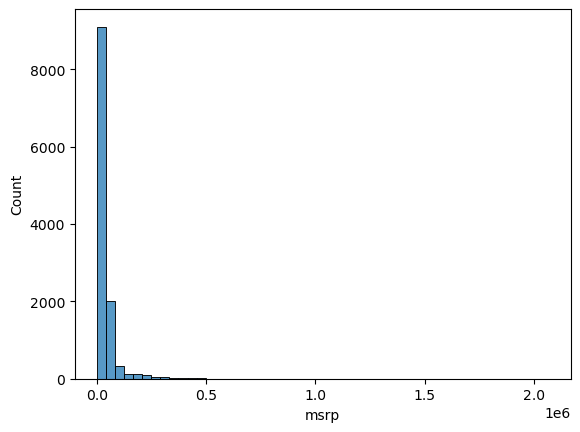

In [39]:
sns.histplot(df.msrp, bins=50)

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

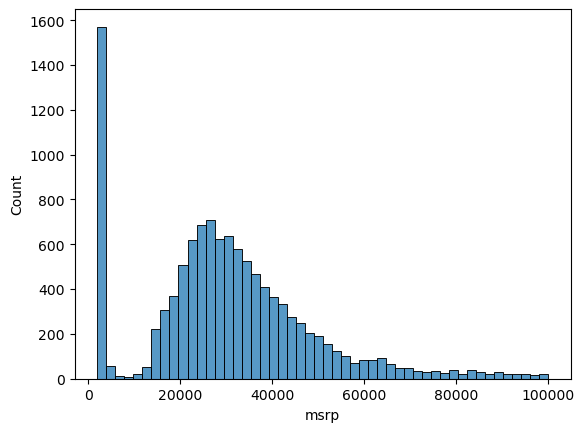

In [40]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

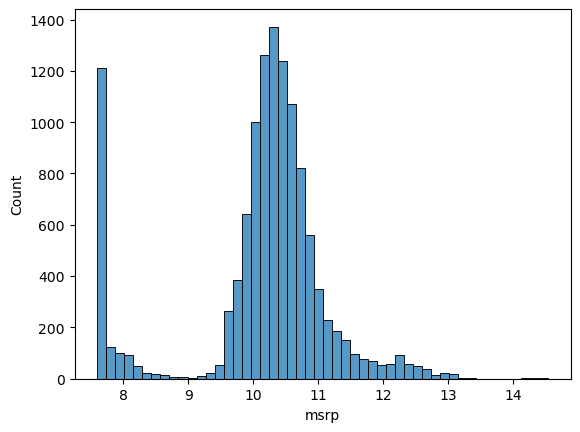

In [41]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

In [42]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Dados para treino e teste

In [43]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(2382, 2382, 7150)

In [44]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [45]:
# random index
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [46]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [47]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [48]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [49]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [50]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [51]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [52]:
len(y_train)

7150

### Car price baseline model

A função `train_linear_regression` implementa o treinamento de um modelo de regressão linear usando o método dos mínimos quadrados. O objetivo é encontrar os coeficientes $w$ que minimizam a soma dos erros quadrados entre as previsões do modelo e os valores reais.

**Passos:**

1. **Adicionando o Termo de Interceptação**:
   - Adiciona uma coluna de 1s à matriz de características $X$ para incluir o termo de interceptação $w_0$ no modelo.

2. **Calculando $X^T \cdot X$**:
   - Calcula a matriz de covariância $X^T \cdot X$, onde $X^T$ é a transposta da matriz $X$.

3. **Calculando a Inversa de $X^T \cdot X$**:
   - Calcula a inversa da matriz $(X^T \cdot X)^{-1}$.

4. **Calculando os Coeficientes $w$**:
   - Resolve a equação normal para encontrar os coeficientes $w$:
     $$
     w = (X^T \cdot X)^{-1} \cdot X^T \cdot y
     $$
   - `w_full[0]` corresponde ao termo de interceptação $w_0$.
   - `w_full[1:]` corresponde aos coeficientes $w_1, w_2, \ldots, w_n$.

**Fórmula da Regressão Linear:**

$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
$$

Onde:
- $\hat{y}$ é o valor predito.
- $w_0$ é o termo de interceptação.
- $w_1, w_2, \ldots, w_n$ são os coeficientes das variáveis independentes $x_1, x_2, \ldots, x_n$.

**Retorno:**

- **Intercepto** $w_0$
- **Coeficientes** $w_1, w_2, \ldots, w_n$

In [53]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [54]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [55]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [56]:
w0

7.927257388070117

In [57]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

<Axes: ylabel='Count'>

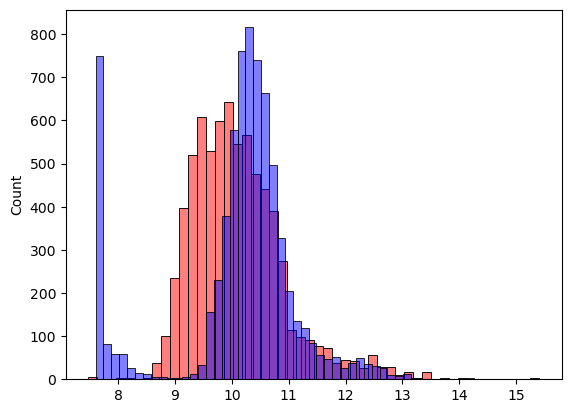

In [61]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### RMSE

In [62]:
def rmse(y, y_pred):
	se = (y - y_pred) ** 2
	mse = se.mean()
	return np.sqrt(mse)
rmse(y_train, y_pred)

0.7554192603920132

### Validacao do modelo

In [63]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301601

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

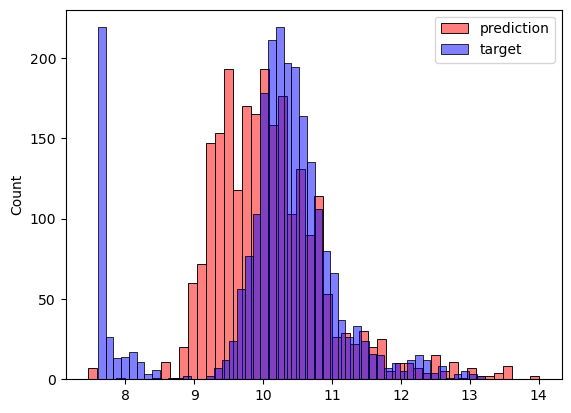

In [65]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

### Regularizacao

- $min_w || Xw - y||^2 _2 + C||w||^2$ -> Rigde
- $min_w || Xw - y||^2 _2 + C||w||$ -> Lasso
	- Tirar a derivada da função de custo em ralação W.
	- E igualar a zero.